**Importing Tools**

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from scipy.stats import boxcox
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

**Uploading_Data_set**

In [4]:
#Uploading Data
df = pd.read_csv('/content/sample_data/cardio_data.csv')
df.head()

,date,country,id,active,age,alco,ap_hi,ap_lo,cholesterol,gender,gluc,height,occupation,smoke,weight,disease
0,03-05-2021,Indonesia,0,1,18393,0,110,80,1,2,1,168,Architect,0,62.0,0
1,05-08-2021,Malaysia,1,1,20228,0,140,90,3,1,1,156,Accountant,0,85.0,1
2,13-11-2022,Indonesia,2,0,18857,0,130,70,3,1,1,165,Chef,0,64.0,1
3,31-10-2018,Singapore,3,1,17623,0,150,100,1,2,1,169,Lawyer,0,82.0,1
4,25-09-2020,Singapore,4,0,17474,0,100,60,1,1,1,156,Architect,0,56.0,0


**Understanding Data**

In [5]:
#Understanding Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         70000 non-null  object 
 1   country      70000 non-null  object 
 2   id           70000 non-null  int64  
 3   active       70000 non-null  int64  
 4   age          70000 non-null  int64  
 5   alco         70000 non-null  int64  
 6   ap_hi        70000 non-null  int64  
 7   ap_lo        70000 non-null  int64  
 8   cholesterol  70000 non-null  int64  
 9   gender       70000 non-null  int64  
 10  gluc         70000 non-null  int64  
 11  height       70000 non-null  int64  
 12  occupation   70000 non-null  object 
 13  smoke        70000 non-null  int64  
 14  weight       70000 non-null  float64
 15  disease      70000 non-null  int64  
dtypes: float64(1), int64(12), object(3)
memory usage: 8.5+ MB


**Data Cleaning**


In [6]:
#converting Age to years
#will also over write the original age column
df['age'] = df['age'] / 365

#converting height from cm to meters
# Assuming 'Height' is in centimeters
df['height'] = df['height'] / 100
df.head()

,date,country,id,active,age,alco,ap_hi,ap_lo,cholesterol,gender,gluc,height,occupation,smoke,weight,disease
0,03-05-2021,Indonesia,0,1,50.391781,0,110,80,1,2,1,1.68,Architect,0,62.0,0
1,05-08-2021,Malaysia,1,1,55.419178,0,140,90,3,1,1,1.56,Accountant,0,85.0,1
2,13-11-2022,Indonesia,2,0,51.663014,0,130,70,3,1,1,1.65,Chef,0,64.0,1
3,31-10-2018,Singapore,3,1,48.282192,0,150,100,1,2,1,1.69,Lawyer,0,82.0,1
4,25-09-2020,Singapore,4,0,47.873973,0,100,60,1,1,1,1.56,Architect,0,56.0,0


**Inspecting for Missing Values**

In [7]:
# Check for missing values in each column
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

Series([], dtype: int64)


In [8]:
#ckeaking for duplicates
df.duplicated().sum()

0

**Inspecting & Handling Outliers**


In [9]:
# Calculate IQR for numerical columns to find outliers
def identify_outliers(df, column):
    Q1 = df[column].quantile(0.25)  # First quartile
    Q3 = df[column].quantile(0.75)  # Third quartile
    IQR = Q3 - Q1  # Interquartile range
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

# Identify Outliears in each of the numerical columns
outliers_Age_in_years = identify_outliers(df, 'age')
outliers_Height_in_meters = identify_outliers(df, 'height')
outliers_weight = identify_outliers(df, 'weight')
outliers_cholesterol = identify_outliers(df, 'cholesterol')
outliers_ap_hi = identify_outliers(df, 'ap_hi')
outliers_ap_lo = identify_outliers(df, 'ap_lo')

# Print the outliers to inspect
print("Outliers in age:\n", outliers_Age_in_years)
print("\nOutliers in height:\n", outliers_Height_in_meters)
print("\nOutliers in weight:\n", outliers_weight)
print("\nOutliers in cholesterol:\n", outliers_cholesterol)
print("\nOutliers in ap_hi:\n", outliers_ap_hi)
print("\nOutliers in ap_lo:\n", outliers_ap_lo)


#We do not have outliers so No reason to capp anything & Handling Them

Outliers in age:
 None

Outliers in height:
 None

Outliers in weight:
 None

Outliers in cholesterol:
 None

Outliers in ap_hi:
 None

Outliers in ap_lo:
 None


In [10]:
df.head()

,date,country,id,active,age,alco,ap_hi,ap_lo,cholesterol,gender,gluc,height,occupation,smoke,weight,disease
0,03-05-2021,Indonesia,0,1,50.391781,0,110,80,1,2,1,1.68,Architect,0,62.0,0
1,05-08-2021,Malaysia,1,1,55.419178,0,140,90,3,1,1,1.56,Accountant,0,85.0,1
2,13-11-2022,Indonesia,2,0,51.663014,0,130,70,3,1,1,1.65,Chef,0,64.0,1
3,31-10-2018,Singapore,3,1,48.282192,0,150,100,1,2,1,1.69,Lawyer,0,82.0,1
4,25-09-2020,Singapore,4,0,47.873973,0,100,60,1,1,1,1.56,Architect,0,56.0,0


**Scale/Normalizing Standard Scale**

In [11]:
#Using StandardScaler (Mean = 0, Standard Deviation = 1)
from sklearn.preprocessing import StandardScaler

# Instantiate the scaler
scaler = StandardScaler()

# Select continuous columns to scale
continuous_cols = ['age', 'ap_hi', 'ap_lo', 'weight', 'height']

# Fit and transform the columns
df[continuous_cols] = scaler.fit_transform(df[continuous_cols])


**Correlation Matrix**

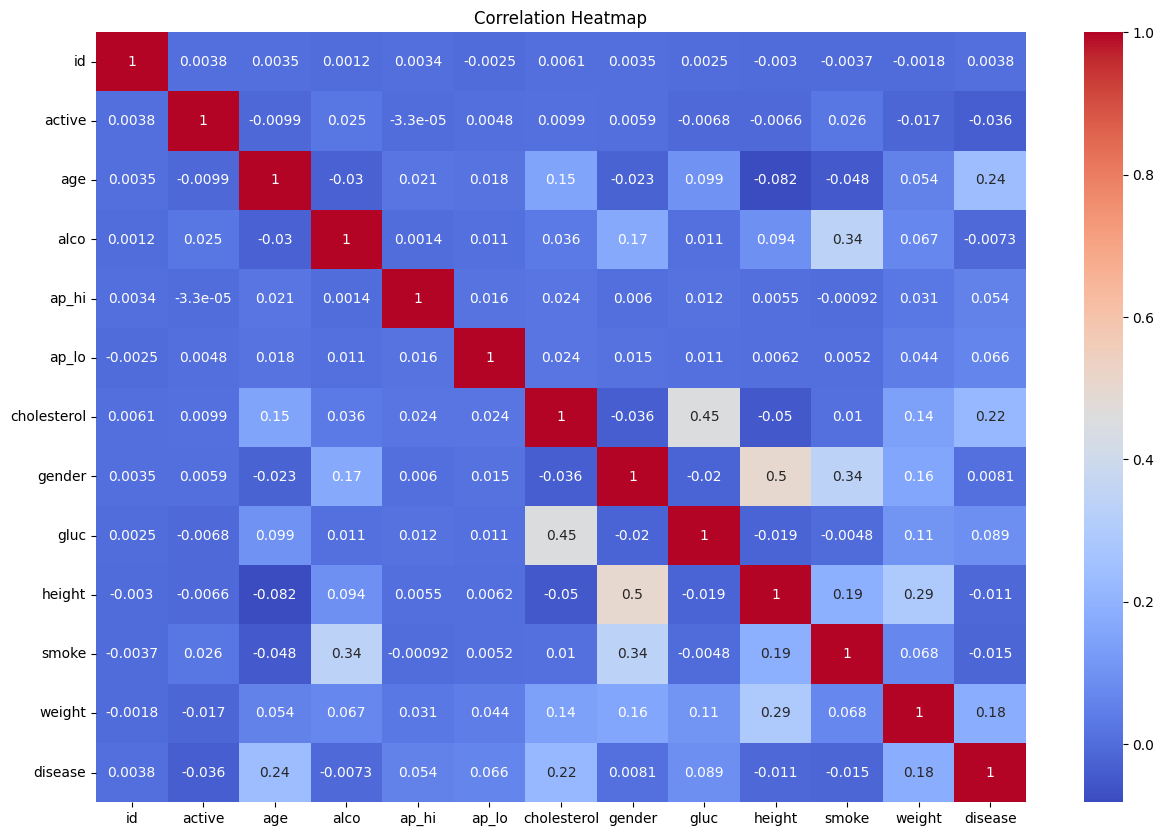

0.01

In [12]:
#Printing out Correlation Heat Map for Numerical columns
plt.figure(figsize=(15, 10))
numerical_columns = df.select_dtypes(include=[np.number])
Correlation_matrix = numerical_columns.corr()
sns.heatmap(numerical_columns.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()
2
.01

#**Intepretion of the above Correlation Matrix**

- For simplycity let use use the **colur scales**: The dark red values show us that there is strong posistive correlation between two features. for example (**ap_hi & ap_lo**)

- Dark_Blue which are high negative values show us strong negative correlation. as one increases the other tends to decrease.for example (weight and age)

- White boxes which are low absolute values that are close to zero show use waek or no correlation.

- Diagonal line shows us a perfact correlation 1

- When looking at our Target variable correlation we can see that columns with stronger correlation with it are Age, Cholesterol and weight meaning that an increase in any of these features has likelihood of disease presence.


#**plotting the correlation between features in encoded dataset and the target variable'disease'**

In [18]:
# Convert the 'date' column to datetime objects, specifying the correct format
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y')
#The format was specified to be  '%d-%m-%Y' because
#the data in the date column is in Day-Month-Year format,
#not the default Month-Day-Year that pandas uses.

<Axes: >

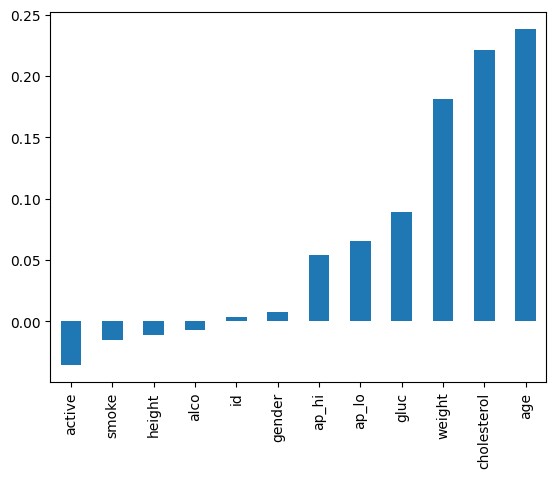

In [20]:
# Convert the 'date' column to datetime objects if it's not already
df['date'] = pd.to_datetime(df['date'])

# Extract numerical features for correlation analysis
numerical_features = df.select_dtypes(include=np.number).columns

# Calculate correlation matrix only for numerical features
correlation_matrix = df[numerical_features].corr()

df[numerical_features].corr()['disease'][:-1].sort_values().plot(kind='bar')

#**Interpreting the Above correlation graph**

- These bars represent the correlation of a feature with our target column Disease. it is sorted in ascending order with negative correlations on the left and positive ones on the right.

- The bars closer to zero indicate a weak correlation with disease.

- strongly correlated features are the ones that should be prioritized as they are more likely to contribute to accurate predictions

#**Target variable Disease**

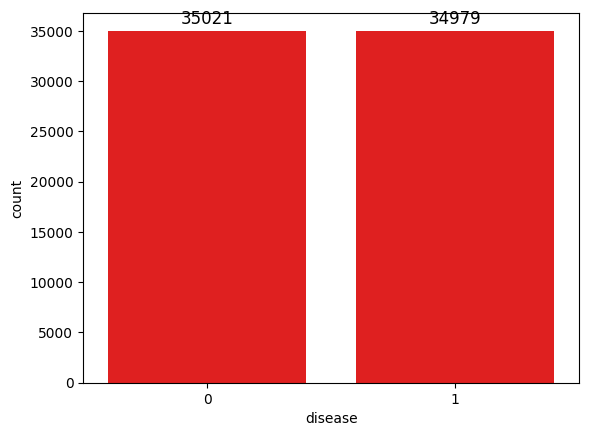

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the count plot
ax = sns.countplot(x='disease', data=df, color='#FF0000')

# Add counts on top of each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'baseline',
                color='black', fontsize=12, xytext=(0, 5),
                textcoords='offset points')

plt.show()


#**Machine_Learning_Model**

Spliting data into training and testing set

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#'disease' is the target variable
# Selecting feature columns for prediction
features = ['age', 'ap_hi', 'ap_lo', 'weight', 'height', ]
X = df[features]
y = df['disease']

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)


Mean Squared Error: 0.22502956717741537
R^2 Score: 0.09987908603704065


**Visuals**

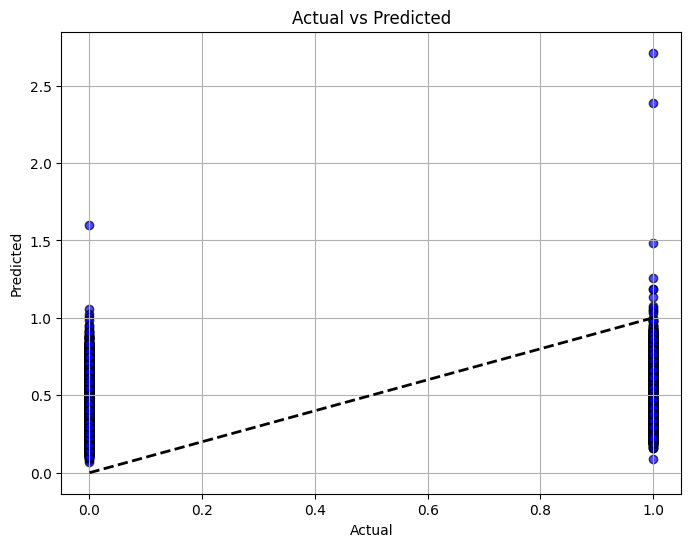

In [24]:
# Plot 1: Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.grid(True)
plt.show()



**Actual vs Predicted Plot**

This plot helps us to see how close our model's predictions (y_pred) are to the true values (y_test).

Ideally, all points should lie close to the diagonal line if the model is performing well.

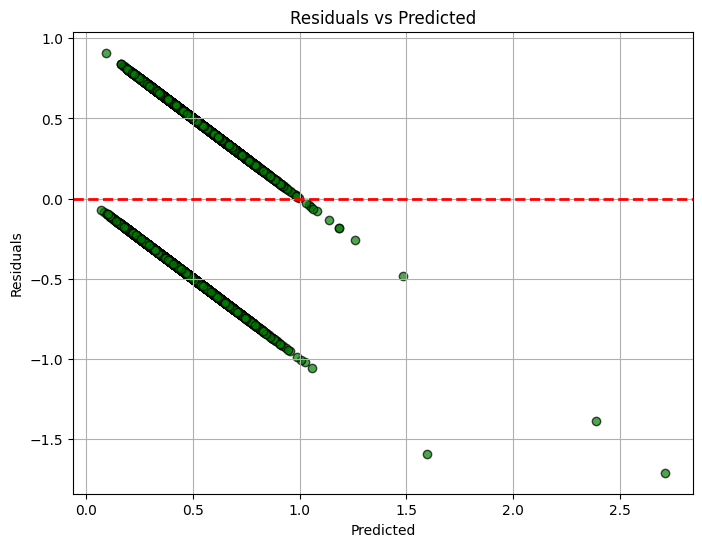

In [25]:
# Plot 2: Residuals Plot
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, color='green', edgecolor='k', alpha=0.7)
plt.axhline(0, color='red', linestyle='--', lw=2)
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted')
plt.grid(True)
plt.show()

**Residuals Plot**

This plot shows us the difference between the actual and predicted values.

It's useful when checking if there's a pattern in the residuals, which might indicate issues with the model (e.g., non-linearity).

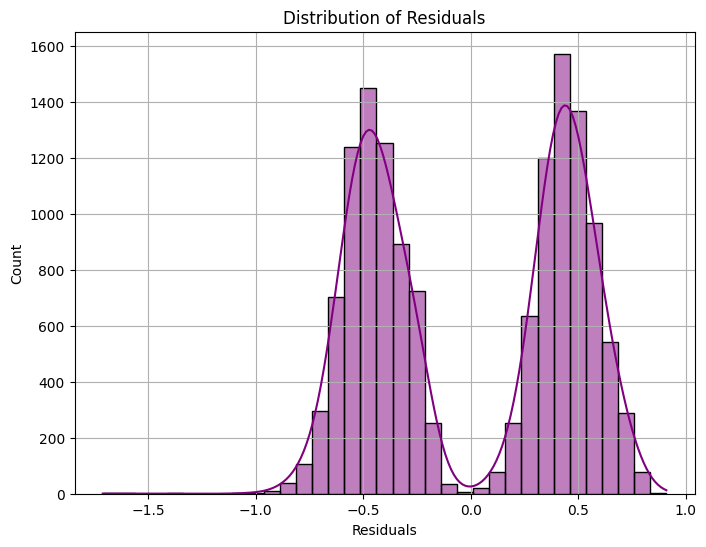

In [26]:

# Plot 3: Distribution of Residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, color='purple')
plt.xlabel('Residuals')
plt.title('Distribution of Residuals')
plt.grid(True)
plt.show()


**Residuals Distribution**

 A histogram or kernel density estimate (KDE) helps us check if the residuals are normally distributed.

 In linear regression normally distributed residuals indicate a well-performing model.

**Interpretation**

According to the results above my MSE of 0.23 is low meaning the model is making predictions close to the actual disease values. Suggeting that age weight, height, ap_lo and ap_hi cotain useful information for predictind disease. (less erros)

In tearms of R^2 Score of 0.1 which is close to 0 suggets that our features do not explain much of th variability in disease. (less explanatory power)



**Data preprocessing**

In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Scale the feature set X


**Model Training**

In [19]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_scaled, y)  # Where y is the target variable (disease presence/absence)


LogisticRegression()

**Model Evaluation**

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming you have X_train, X_test, y_train, y_test

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
X_scaled = scaler.fit_transform(X_train)

# Train the Logistic Regression model
model = LogisticRegression()
model.fit(X_scaled, y_train)

# Scale the test data using the same scaler
X_test_scaled = scaler.transform(X_test)  # This line is crucial

# Make predictions on the scaled test data
y_pred = model.predict(X_test_scaled)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

Accuracy: 0.7111428571428572
Precision: 0.7249166414064868
Recall: 0.6821163719338277
F1 Score: 0.7028655400440852


**Visuals**

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler # Import StandardScaler

# Assuming X is your original feature data
# Assuming you have X_train, X_test, y_train, y_test
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train) # Recalculating X_scaled based on X


# Create and train the Logistic Regression model
model = LogisticRegression()
model.fit(X_scaled, y_train)  # Changed 'y' to 'y_train' to match the number of samples in X_scaled

LogisticRegression()

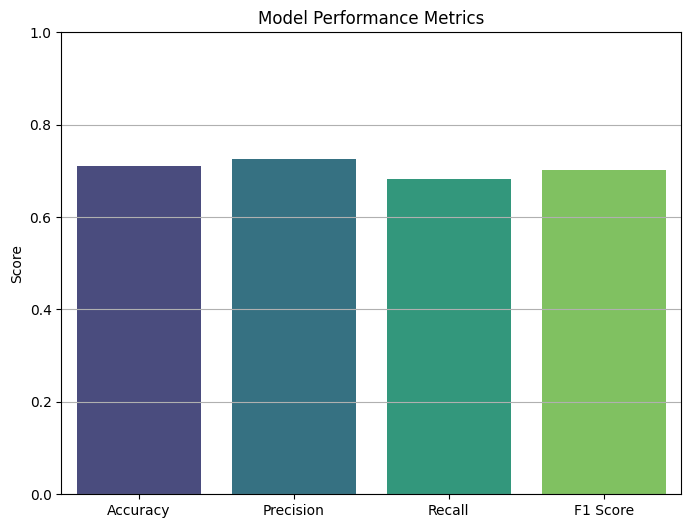

In [35]:
# Plot 2: Bar Chart of Evaluation Metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [0.7111, 0.7249, 0.6821, 0.7029]  # Replace with the exact values from your output

plt.figure(figsize=(8, 6))
sns.barplot(x=metrics, y=values, palette='viridis')
plt.ylim(0, 1)
plt.title('Model Performance Metrics')
plt.ylabel('Score')
plt.grid(True, axis='y')
plt.show()

#Interpreting the above results
- Accuracy of 71.12% (measures the propotion of total correct predictions) meaning the model is correctly predicting the precese or absence of the disease.

- Precision of 72.5% (proportion of true positive predictions out of all positive predictions) this tells us that when the model predicts a positive case (presence of disease), it is correct 72.5% of the time.

- Recall of 68.2% the model identifies 68.2% of all actual disease cases correctly
- F1 Score of 70.3% indicates a balanced performance between precision and recall.

- All in all our model is moderately effective, with balanced performance across these metrics, especially given that the precision and recall are close to each other. This indicates the model isn’t heavily biased toward one type of error

**Random Forest**

In [38]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Feature Importance
importances = rf_model.feature_importances_
feature_names = X_train.columns
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values(by='Importance', ascending=False)
print(feature_importances)


  Feature  Importance
0     age    0.393930
3  weight    0.174697
1   ap_hi    0.172402
4  height    0.162787
2   ap_lo    0.096183


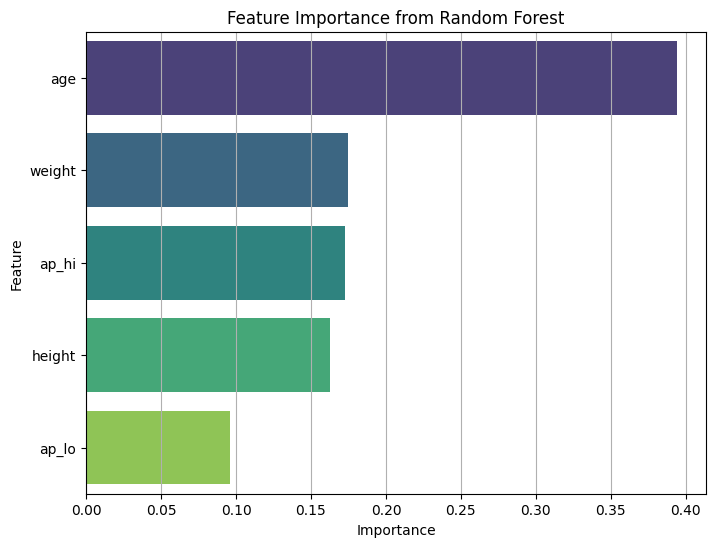

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot: Feature Importance
plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis')
plt.title('Feature Importance from Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.grid(True, axis='x')
plt.show()


#**interpretation of Feature impotance scores:**

- Age has a score of 39.4% which means it plays a significant role in determining the disease outcome and it has the larget impact on the model predictions.
- Disease is closely related to age because age seems to be highly influential.

- Weight has a score of 17.5% meaning it is the second most important feature.(It has moderate impact on predicting the disease).

- ap_hi has a score of 17.2% this tells us that blood pressure is relevent to disease predictions.

- height has a score of 16.3% meaning it also does have a notable factor even if thogh it is slightly less important than weight.

- ap_lo is our lowest important feature as it has the lowest score of 9.6%. this means that it could have some relevence to disease but its not as strong.



#**Model Evaluation**



**Using accuracy for overall performance**


In [22]:
#Train test split
from sklearn.model_selection import train_test_split

# Assuming 'disease' is your target variable
X = df.drop(columns=['disease'])
y = df['disease']

# Split data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Training The Model

In [37]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# ... (your existing code for loading and preparing data)

# Assuming 'disease' is your target variable and 'date' is the column with date strings
X = df.drop(columns=['disease'])
y = df['disease']

# Convert the date column to numerical features
if 'date' in X.columns:
    X['date'] = pd.to_datetime(X['date'], format='%d-%m-%Y')
    X['year'] = X['date'].dt.year
    X['month'] = X['date'].dt.month
    X['day'] = X['date'].dt.day
    X = X.drop(columns=['date'])

# Convert categorical features to numerical using Label Encoding
categorical_features = ['country', 'occupation']  # Add other categorical columns if needed
for feature in categorical_features:
    if feature in X.columns:
        le = LabelEncoder()
        X[feature] = le.fit_transform(X[feature])

# Split data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Example: Decision Tree model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# ... (rest of your code)


DecisionTreeClassifier()

**Making Predictions on Test Set**

In [30]:
# Predict on test data
y_pred = model.predict(X_test)


**Calclating Accuracy**

In [31]:
from sklearn.metrics import accuracy_score

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")


Model Accuracy: 63.25%


**Visuals**

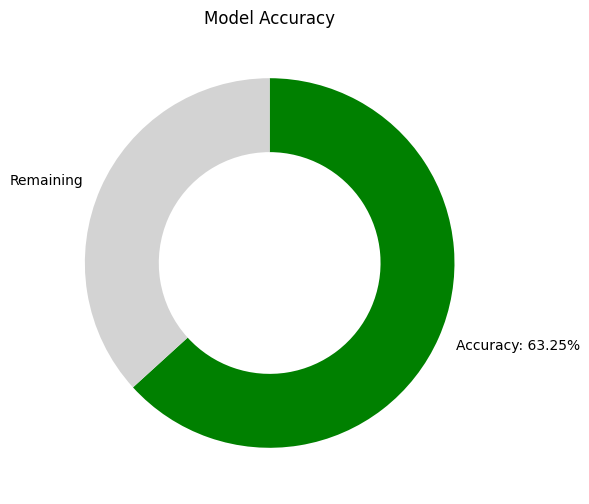

In [40]:
import matplotlib.pyplot as plt

# Data for the chart
accuracy = 63.25
remaining = 100 - accuracy

# Donut chart
plt.figure(figsize=(6, 6))
plt.pie([accuracy, remaining], labels=[f'Accuracy: {accuracy}%', 'Remaining'], colors=['green', 'lightgray'], startangle=90, counterclock=False, wedgeprops=dict(width=0.4))

plt.title('Model Accuracy')
plt.show()


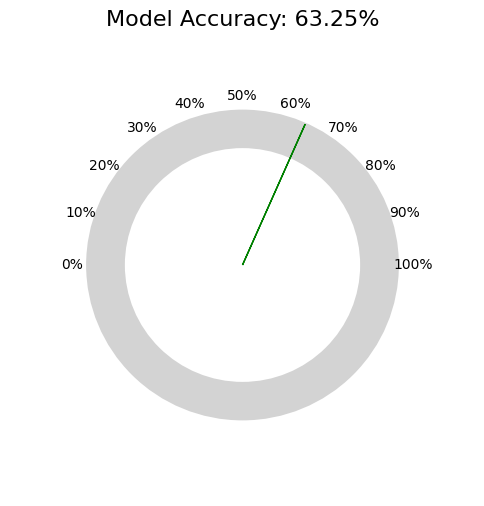

In [41]:
import numpy as np

def gauge_chart(accuracy, title='Model Accuracy'):
    fig, ax = plt.subplots(figsize=(6, 6))

    # Draw gauge background
    ax.add_patch(plt.Circle((0, 0), 1, color='lightgray', lw=2))
    ax.add_patch(plt.Circle((0, 0), 0.75, color='white', lw=2))

    # Draw the pointer for the accuracy
    angle = (accuracy / 100) * 180  # Convert percentage to angle
    x = np.cos(np.radians(180 - angle))
    y = np.sin(np.radians(180 - angle))
    ax.add_patch(plt.Polygon([[0, 0], [x, y], [0.05 * x, 0.05 * y]], color='green'))

    # Draw ticks and labels
    for i in range(0, 101, 10):
        angle = (i / 100) * 180
        x = np.cos(np.radians(180 - angle))
        y = np.sin(np.radians(180 - angle))
        ax.text(1.1 * x, 1.1 * y, f'{i}%', ha='center', va='center')

    # Hide axes
    ax.set_xlim(-1.5, 1.5)
    ax.set_ylim(-1.5, 1.5)
    ax.axis('off')

    # Set title
    plt.title(f'{title}: {accuracy}%', fontsize=16)

    plt.show()

# Call the gauge chart function
gauge_chart(accuracy)


#Interpreting the Accuracy

- The Accuracy of 63.3% means that our model correcly pridicted the targert outcome which is the presence/absence of the disease.  This simply means that out of all predictions 63.3% was accurate while 37% was incorrect.



In [45]:
from google.colab import files

# Create a sample dataset
data = {'col1': [1, 2, 3], 'col2': [4, 5, 6]}
df = pd.DataFrame(data)

# Save to CSV
df.to_csv('my_dataset.csv', index=False)  # Save the DataFrame to a CSV file

# Download
files.download('my_dataset.csv')  # Download the created file

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#**THE END**